In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
df=pd.read_csv('WebsiteTrafficAnalysis.csv')
df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


# DATA PREPROCESSING

In [8]:
newdata= df.groupby('Day').size().rename_axis('Days').reset_index(name='Count')
newdata.head

<bound method NDFrame.head of         Days  Count
0     Friday    309
1     Monday    310
2   Saturday    309
3     Sunday    310
4   Thursday    309
5    Tuesday    310
6  Wednesday    310>

In [9]:
labels=newdata.Days
values= newdata.Count

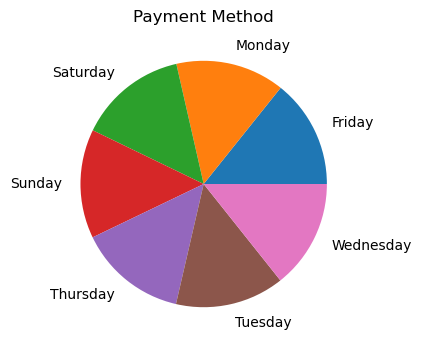

In [10]:
plt.figure(figsize=(5,4))
plt.pie(values,labels=labels, labeldistance=1.15 );
plt.title("Payment Method")
plt.show();

In [15]:
print('Missing values:\n', df.isnull().sum())

Missing values:
 Row                  0
Day                  0
Day.Of.Week          0
Date                 0
Page.Loads           0
Unique.Visits        0
First.Time.Visits    0
Returning.Visits     0
dtype: int64


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   object
 5   Unique.Visits      2167 non-null   object
 6   First.Time.Visits  2167 non-null   object
 7   Returning.Visits   2167 non-null   object
dtypes: int64(2), object(6)
memory usage: 135.6+ KB
None


In [17]:
df['Date']= pd.to_datetime(df['Date'])

In [3]:
numeric_columns=['Page.Loads','Unique.Visits','First.Time.Visits','Returning.Visits']
for col in numeric_columns:
    df[col]=pd.to_numeric(df[col].str.replace(',',''),errors='coerce')
print('Dataset after preprocessing:\n')
print(df.info())
print('Summary Statistics:\n')
print(df.describe())
print('Done Preprocessing the data')

Dataset after preprocessing:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Row                2167 non-null   int64 
 1   Day                2167 non-null   object
 2   Day.Of.Week        2167 non-null   int64 
 3   Date               2167 non-null   object
 4   Page.Loads         2167 non-null   int64 
 5   Unique.Visits      2167 non-null   int64 
 6   First.Time.Visits  2167 non-null   int64 
 7   Returning.Visits   2167 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 135.6+ KB
None
Summary Statistics:

               Row  Day.Of.Week   Page.Loads  Unique.Visits  \
count  2167.000000  2167.000000  2167.000000    2167.000000   
mean   1084.000000     3.997231  4116.989386    2943.646516   
std     625.703338     2.000229  1350.977843     977.886472   
min       1.000000     1.000000  1002.000000     667.000000   
2

# EXPLORATORY DATA ANALYSIS[EDA]

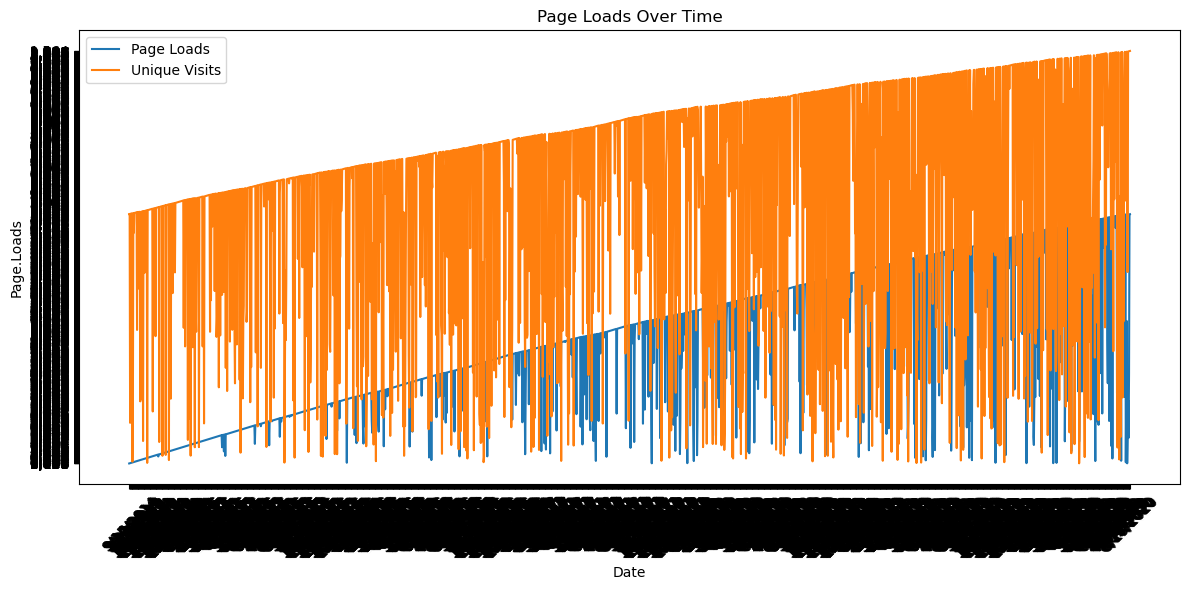

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Page.Loads'],label='Page Loads')
plt.plot(df['Date'],df['Unique.Visits'],label='Unique Visits')
plt.title('Page Loads Over Time')
plt.xlabel('Date')
plt.ylabel('Page.Loads')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('daily_traffic.png')
plt.show()

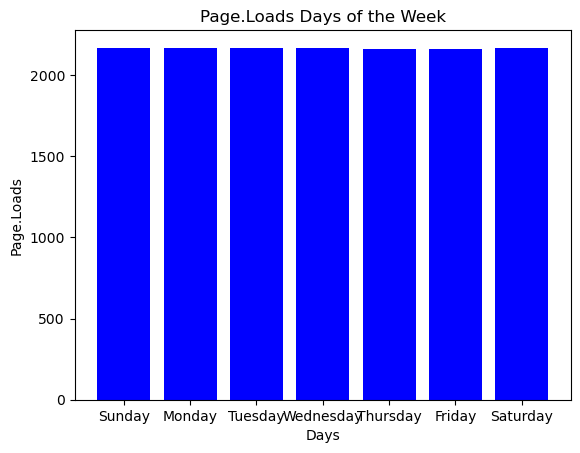

In [6]:
x=list(df.iloc[:,1])
y=list(df.iloc[:,0])
plt.bar(x,y,color='b')
plt.title('Page.Loads Days of the Week')
plt.xlabel("Days")
plt.ylabel("Page.Loads")
plt.show()

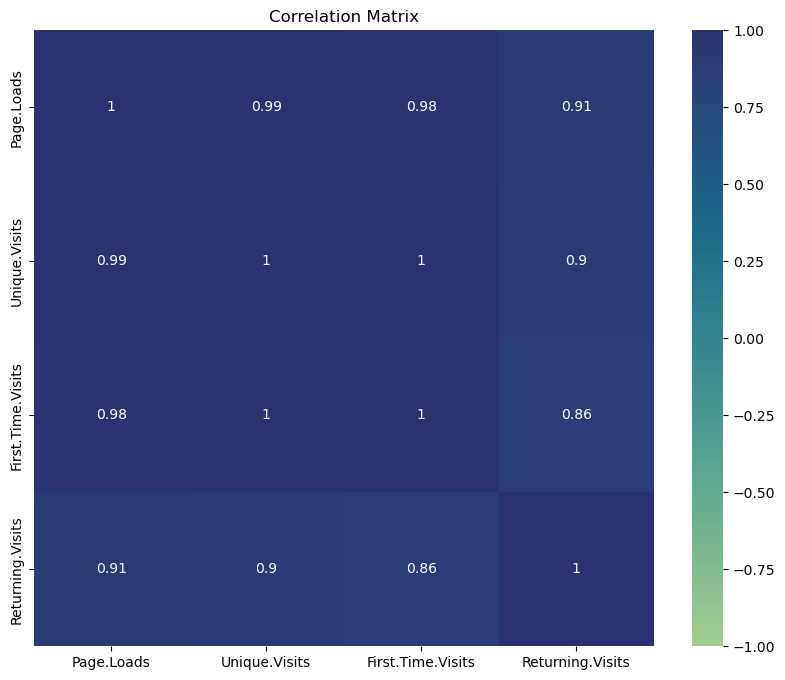

In [11]:
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [20]:
summary_stats=df[numeric_columns].describe()
print("Summary Statistics")
print(summary_stats)

Summary Statistics
        Page.Loads  Unique.Visits  First.Time.Visits  Returning.Visits
count  2167.000000    2167.000000        2167.000000       2167.000000
mean   4116.989386    2943.646516        2431.824181        511.822335
std    1350.977843     977.886472         828.704688        168.736370
min    1002.000000     667.000000         522.000000        133.000000
25%    3114.500000    2226.000000        1830.000000        388.500000
50%    4106.000000    2914.000000        2400.000000        509.000000
75%    5020.500000    3667.500000        3038.000000        626.500000
max    7984.000000    5541.000000        4616.000000       1036.000000


# RFM METRICS

In [13]:
df_recency = df.groupby(by='Unique.Visits', as_index=False)['Day.Of.Week'].max()
df_recency.columns = ['Unique.Visits', 'Page.Loads']
recent_date = df_recency['Page.Loads'].max()
df_recency['Recency'] = df_recency['Page.Loads'].apply(
    lambda x: (recent_date - x))
df_recency.head()


,Unique.Visits,Page.Loads,Recency
0,667,5,2
1,724,6,1
2,825,7,0
3,836,7,0
4,876,5,2


In [14]:
frequency_df = df.drop_duplicates().groupby(by=['Unique.Visits'], as_index=False)['Page.Loads'].count()
frequency_df.columns = ['Unique.Visits', 'Frequency']
frequency_df.head()

,Unique.Visits,Frequency
0,667,1
1,724,1
2,825,1
3,836,1
4,876,1


In [17]:
df['Total'] = df['Page.Loads']*df['Day.Of.Week']
monetary_df = df.groupby(by='Unique.Visits', as_index=False)['Total'].sum()
monetary_df.columns = ['Unique.Visits', 'Monetary']
monetary_df.head()

,Unique.Visits,Monetary
0,667,5010
1,724,6102
2,825,7805
3,836,8316
4,876,6325


In [18]:
rf_df = df_recency.merge(frequency_df, on='Unique.Visits')
rfm_df = rf_df.merge(monetary_df, on='Unique.Visits').drop(columns='Page.Loads')
rfm_df.head()


,Unique.Visits,Recency,Frequency,Monetary
0,667,2,1,5010
1,724,1,1,6102
2,825,0,1,7805
3,836,0,1,8316
4,876,2,1,6325


In [19]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,Unique.Visits,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,667,2,1,5010,64.158416,38.122548,38.088058
1,724,1,1,6102,81.650165,38.122548,38.088058
2,825,0,1,7805,100.000000,38.122548,38.088058
3,836,0,1,8316,100.000000,38.122548,38.088058
4,876,2,1,6325,64.158416,38.122548,38.088058


# VISUALIZATION

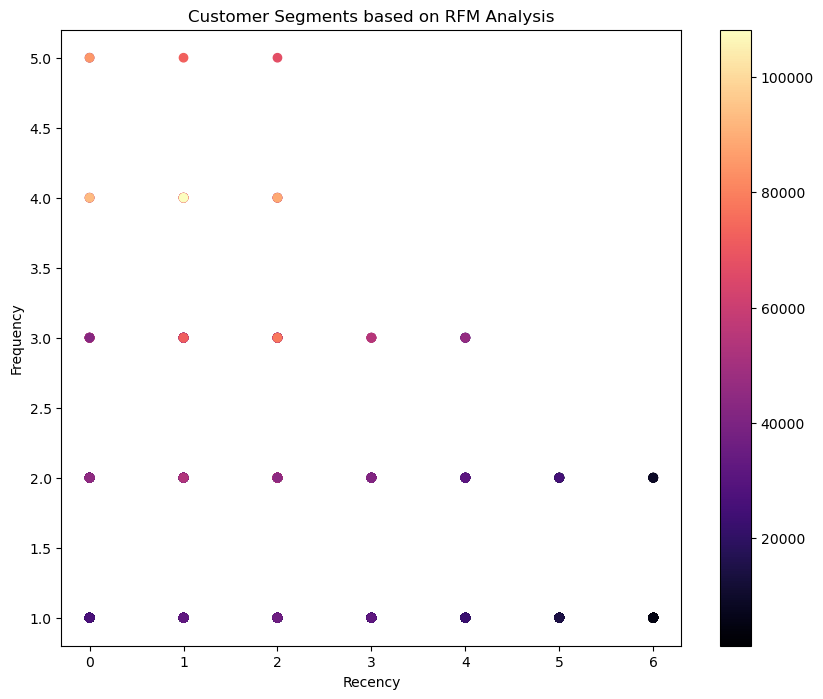

In [27]:
# Visualize clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], c=rfm_df['Monetary'], cmap='magma')
plt.colorbar(scatter)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Customer Segments based on RFM Analysis')
plt.savefig('rfm_clusters.png')
plt.show()



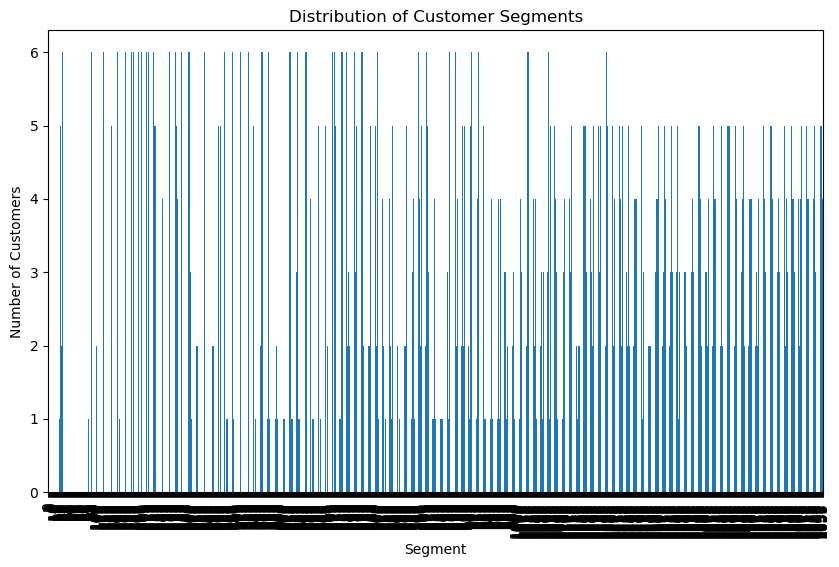

Segment Distribution:
0       2
1       1
2       0
3       0
4       2
       ..
1653    3
1654    5
1655    3
1656    4
1657    3
Name: Recency, Length: 1658, dtype: int64


In [43]:
# Visualize segment distribution
segment_counts = rfm_df['Recency']
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Distribution of Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.savefig('segment_distribution.png')
plt.show()

print('\
Segment Distribution:')
print(segment_counts)